This notebook is used to export plain fits files for Kelsey Maas

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
import numpy as np
from scipy import constants

import lsst.daf.persistence as daf_persistence

In [4]:
def look(img, range=None, x_range=None, y_range=None, large=False):
    """Simple function to wrap matplotlib and display an image with a colorbar."""
    if large:
        plt.figure(figsize=(32, 12))
    else:
        plt.figure(figsize=(16, 6))
    if range is None:
        range = [np.min(img), np.max(img)]
#     img_use = np.clip(img, range[0], range[1])
    img_use = img.copy()
    if x_range is not None:
        x0 = int(x_range[0])
        x1 = int(x_range[1])
        if x0 < 0:
            img_use = np.roll(img_use, -x0, axis=1)
            x1 -= x0
            x0 = 0
        img_use = img_use[:, x0: x1]
    if y_range is not None:
        y0 = int(y_range[0])
        y1 = int(y_range[1])
        if y0 < 0:
            img_use = np.roll(img_use, -y0, axis=0)
            y1 -= y0
            y0 = 0
        img_use = img_use[y0: y1, :]
#     if preserve_scale:
#         img_use[0,0] = range[0]
#         img_use[-1,-1] = range[1]
    fig_show = plt.imshow(img_use, interpolation='none', origin='lower', cmap=cm.rainbow, clim=range)
    plt.colorbar(fig_show, orientation='vertical', shrink=1)
#    cbar.set_label('DCR (arcsec)', labelpad=0)
    plt.show()

In [5]:
repository = '/Users/sullivan/LSST/simulations/test5/output_data/'
obsid_range = np.arange(100, 124, 3)
band_name = "g"

In [6]:
from python.buildDcrCoadd import BuildDcrCoadd
from python.generateTemplate import GenerateTemplate

In [7]:
self = BuildDcrCoadd(n_step=3, input_repository=repository, obsids=obsid_range, filter_name=band_name, debug_mode=False)

In [8]:
output_directory='/Users/sullivan/Dropbox/LSST/DCR_export_data/'
from astropy.io import fits

In [7]:
self.calc_psf_model()
# look(self.psf_avg)

In [8]:
x0 = 150
dx = 65
y0 = 480
dy = 70

In [9]:
x0 = 300
dx = 200
y0 = 500
dy = 200

In [10]:
x0 = 840
dx = 50
y0 = 628
dy = 80

In [11]:
x0=400
dx=50
y0=500
dy=80

In [9]:
self.build_model(max_iter=10, test_convergence=True, min_iter=5, refine_solution=True,
                 use_variance=True, frequency_regularization=False, clamp=1.5)

Calculating initial solution... Done!
Fractional change per iteration:
Full initial convergence metric:  [ 0.13177793  0.11615348  0.10393303  0.10157001  0.09366119  0.09096211
  0.08706858  0.08776681]
Iteration 0: delta=0.323821
Full convergence metric: [ 0.10651495  0.09638263  0.06866974  0.06547045  0.0478617   0.04997245
  0.04560577  0.0479406 ]
Convergence metric: 0.066052
Iteration 1: delta=0.093744
Full convergence metric: [ 0.09303859  0.08497268  0.05989624  0.05702933  0.04489522  0.04426211
  0.04479939  0.04529332]
Convergence metric: 0.059273
Iteration 2: delta=0.048243
Full convergence metric: [ 0.08582549  0.07938218  0.05353521  0.05198666  0.0411327   0.0407688
  0.04168354  0.04190748]
Convergence metric: 0.054528
Iteration 3: delta=0.030435
Full convergence metric: [ 0.08036752  0.07471137  0.04933566  0.0480995   0.03965461  0.03876517
  0.04158735  0.04131168]
Convergence metric: 0.051729
Iteration 4: delta=0.023177
Full convergence metric: [ 0.076378    0.0715

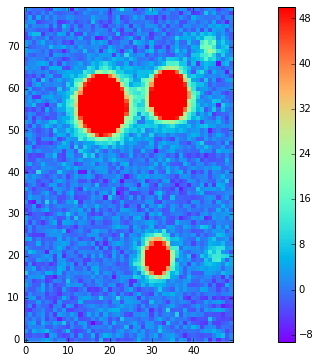

('max: ', 1893.8088, 'sum: ', 91015.25)
Matched-scale SUM


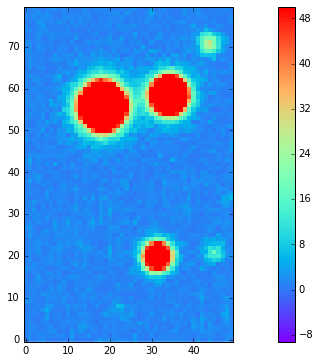

('max: ', 2766.5049953093148, 'sum: ', 94534.12090880677)


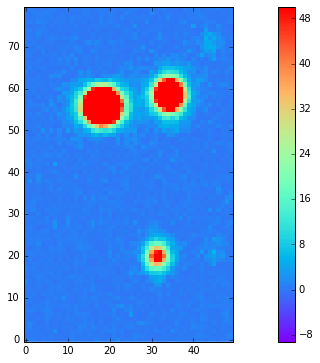

('max: ', 1006.7531402479931, 'min: ', 0.00018754323575782394, 'sum: ', 32401.28779697316)


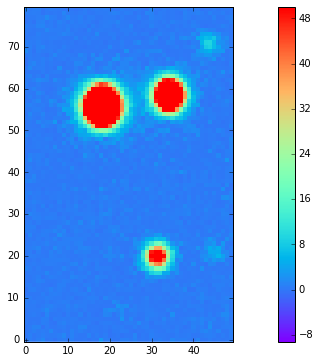

('max: ', 866.4983832516416, 'min: ', 5.4268328533099708e-06, 'sum: ', 30933.946791809747)


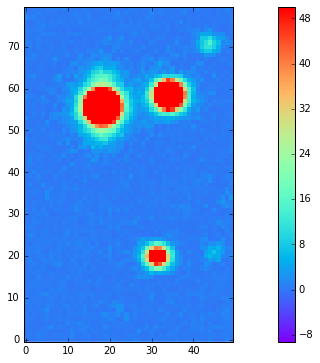

('max: ', 893.25347180967992, 'min: ', 0.00017381180412868926, 'sum: ', 31198.88632002387)
SUM


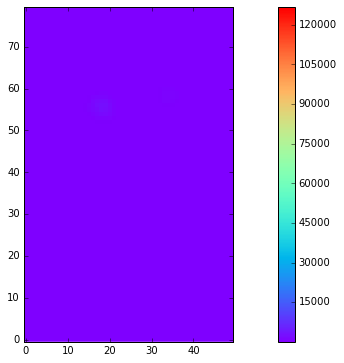

('max: ', 2766.5049953093148, 'sum: ', 94534.12090880677)
DIFF last - first


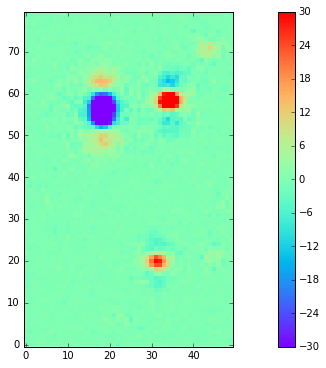

DIFF second - first


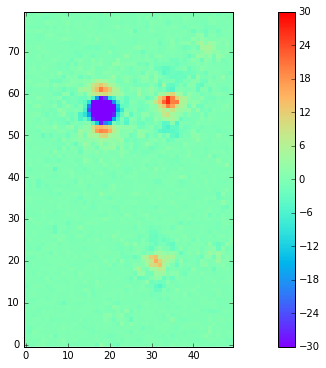

DIFF last - second to last


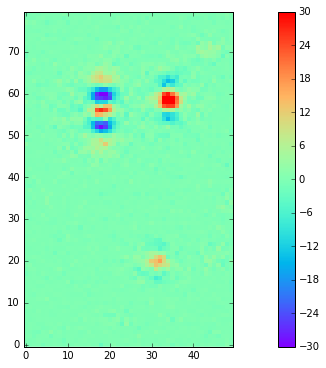

In [12]:
slice_inds = np.s_[y0: y0 + dy, x0: x0 + dx]
ref_im = self.exposures[0].getMaskedImage().getImage().getArray()[slice_inds]
min_use = np.min([np.min(ref_im),50.])
look(ref_im, range=[min_use,50])
print("max: ", np.max(ref_im), "sum: ", np.sum(ref_im))
rescale = 1.
sum_im = np.sum([self.model[_i]*rescale for _i in range(self.n_step)],axis=0)
print("Matched-scale SUM")
look(sum_im,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=[min_use,50])
print("max: ", np.max(sum_im[slice_inds]), "sum: ", np.sum(sum_im[slice_inds]))
for _i in range(self.n_step):
    look(self.model[_i]*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy], range=[min_use,50])
    print("max: ", np.max(self.model[_i][slice_inds]*rescale),
          "min: ", np.min(self.model[_i][slice_inds]*rescale),
          "sum: ", np.sum(self.model[_i][slice_inds]*rescale))
print("SUM")
look(sum_im,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy])
print("max: ", np.max(sum_im[slice_inds]), "sum: ", np.sum(sum_im[slice_inds]))

diff_range = [-30, 30]
print("DIFF last - first")
look((self.model[-1] - self.model[0])*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=diff_range)
print("DIFF second - first")
look((self.model[1] - self.model[0])*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=diff_range)
print("DIFF last - second to last")
look((self.model[-1] - self.model[-2])*rescale,x_range=[x0, x0 + dx], y_range=[y0, y0 + dy],range=diff_range)


In [13]:
template_exposure_gen = self.generate_templates_from_model(obsids=obsid_range,output_repository=None,
                                                           output_obsid_offset=0)
im_arr = {}
i = 0
for exp in template_exposure_gen:
    im_arr[obsid_range[i]] = exp
    i += 1

Working on observation 100 ... Done!
Working on observation 103 ... Done!
Working on observation 106 ... Done!
Working on observation 109 ... Done!
Working on observation 112 ... Done!
Working on observation 115 ... Done!
Working on observation 118 ... Done!
Working on observation 121 ... Done!


In [33]:
from collections import namedtuple
from lsst.afw.geom import Angle
from astropy.io import fits
from python.lsst_defaults import lsst_observatory, lsst_weather
from python.dcr_utils import calculate_rotation_angle
def write_files(self, directory=None):
    #First write the models
    wave_gen = self._wavelength_iterator(self.bandpass, use_midpoint=False)
    variance = np.zeros_like(self.weights)
    variance[self.weights > 0] = 1./self.weights[self.weights > 0]
    variance /= self.n_step
    model_planes = {0:"a", 1:"b", 2:"c"}
    for f in range(self.n_step):
        wl_start, wl_end = wave_gen.next()
        exp = self.create_exposure(self.model[f], variance=variance, mask=self.mask, bbox=self.bbox,
                                   elevation=Angle(np.pi/2), azimuth=Angle(0),
                                   subfilt=f, nstep=self.n_step, wavelow=wl_start, wavehigh=wl_end)
        model_name = directory + str("Model_plane_%s.fits" % model_planes[f])
        exp.writeFits(model_name)
    
    # Write the DCR table 
    mshift = namedtuple("dcr_inner", ["a", "b", "c"])
    # Next write the input data and measured PSFs
    dcr_table = {}
    obsid_range = []
    for exp in self.exposures:
        psf_img = exp.getPsf().computeKernelImage().getArray()
        visitInfo = exp.getInfo().getVisitInfo()
        obsid = visitInfo.getExposureId()
        obsid_range.append(obsid)
        
        el = visitInfo.getBoresightAzAlt().getLatitude()
        rotation_angle = calculate_rotation_angle(exp)
        dcr_gen = self._dcr_generator(self.bandpass, pixel_scale=self.pixel_scale,
                                      observatory=self.observatory, weather=lsst_weather,
                                      elevation=el, rotation_angle=rotation_angle, use_midpoint=True)
        dcr_vals = [dcr for dcr in dcr_gen]
        dcr_table[obsid] = mshift(a=dcr_vals[0], b=dcr_vals[1], c=dcr_vals[2])
        psf_name = directory + str("PSF_%i.fits" % obsid)
        fits.writeto(psf_name, psf_img)
        exp_name = directory + str("Image_%i.fits" % obsid)
        exp.writeFits(exp_name)
    
    # Now generate template exposures
    template_exposure_gen = self.generate_templates_from_model(obsids=obsid_range,output_repository=None,
                                                               output_obsid_offset=0)
    for exp in template_exposure_gen:
        visitInfo = exp.getInfo().getVisitInfo()
        obsid = visitInfo.getExposureId()
        template_name = directory + str("Predicted_image_%i.fits" % obsid)
        exp.writeFits(template_name)
    return(dcr_table)

In [35]:
dcr_table = write_files(self, output_directory)

Working on observation 100 ... Done!
Working on observation 103 ... Done!
Working on observation 106 ... Done!
Working on observation 109 ... Done!
Working on observation 112 ... Done!
Working on observation 115 ... Done!
Working on observation 118 ... Done!
Working on observation 121 ... Done!


In [37]:
repr(dcr_table)

'{100L: dcr_inner(a=dcr(dx=7.0754676766410186e-05, dy=1.8547276108971371), b=dcr(dx=-1.2117069730403724e-05, dy=-0.3176307887935243), c=dcr(dx=-6.6325532143154709e-05, dy=-1.7386242351085786)), 103L: dcr_inner(a=dcr(dx=-1.8377869925420022e-06, dy=-1.5277312078284437), b=dcr(dx=3.1472940026761747e-07, dy=0.26163093370516383), c=dcr(dx=1.7227420088715659e-06, dy=1.4320956349515603)), 106L: dcr_inner(a=dcr(dx=-6.1505952998665078e-05, dy=1.0685397172099236), b=dcr(dx=1.0533166545442638e-05, dy=-0.18299215365440458), c=dcr(dx=5.7655621427767794e-05, dy=-1.0016481074169608)), 109L: dcr_inner(a=dcr(dx=1.0622781850587305e-05, dy=-0.89632725831429894), b=dcr(dx=-1.8191979776810931e-06, dy=0.15349997379223787), c=dcr(dx=-9.9577818371745657e-06, dy=0.84021600165997368)), 112L: dcr_inner(a=dcr(dx=-1.7250881271138867e-05, dy=0.61648141314403526), b=dcr(dx=2.9542882398537326e-06, dy=-0.10557511586302845), c=dcr(dx=1.6170946057370426e-05, dy=-0.57788860294356115)), 115L: dcr_inner(a=dcr(dx=1.20308517

In [49]:
for key, value in dcr_table.iteritems():
    print(value.c.dy)

-1.73862423511
1.43209563495
-1.00164810742
0.84021600166
-0.577888602944
0.466684439162
-0.268123802584
0.176434179659
